In [15]:
import sys
import os

import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


###import packages

# Data

In [70]:
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + 2 * X**3 + np.random.randn(m, 1) * 10 
X_new = np.linspace(0, 3, 100).reshape(100, 1)


#generating our numbers, and making Y into a polynomial function
#X_new is also a set of values

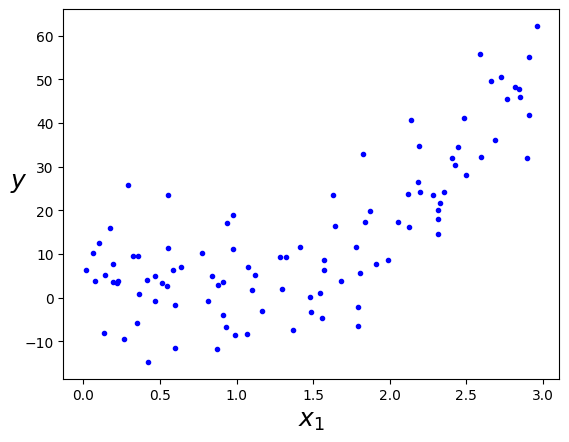

In [71]:
# plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

#graphing our x/y values to see how random they are

# Task 1: Traning and validation MSE

**Task 1:**  Try 1-10th polynomial models and choose appropriate model(s) (You may use `learning_curve` function)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1779: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 79 instead of 80.
  warnings.warn(


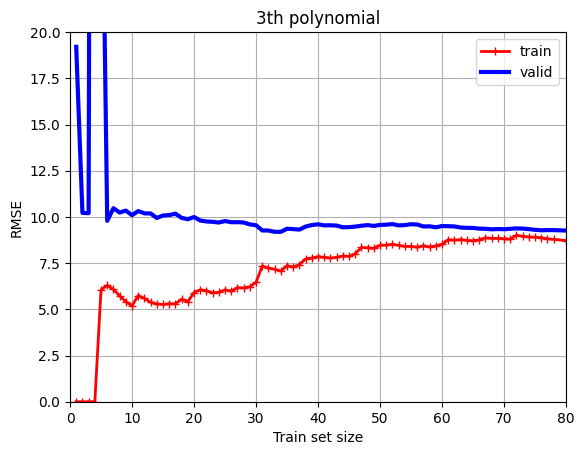

In [146]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

#importing packages

from sklearn.pipeline import make_pipeline

degree = 3
poly_regression = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    LinearRegression()
)
#makes the pipeline so we can automate some steps later on, ie do prediction/fit on all our data in one line later, 
#initalizes the linear regression and standard scaler model (fits your data down decreasing the range so its easier to predict)
# so we can later put our values into it


train_size, train_scores, valid_scores = learning_curve(
    poly_regression, X, y, train_sizes=np.linspace(0.01, 1, 80),
    cv=5, scoring="neg_root_mean_squared_error" #negative root mean squared error
)

#create a learning curve to model how well the regression is working 
#and we initalize our mse scoring to see what degree will give us the lowest error
#and we create 80 values for x/y each from .01 to 1 for our training data

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

#here we create our errors to visualize, where each mean is per fold, the fold is the amount of times we break up the data, cv is our fold
#so we have 5 folds, we multiply our folds by our size to get total error count and remove total duplicates to get 79 errors
#We set the error to be negative because the scalar sets our values to negatives, we have to use the - function to make it positive 
#to make sure we're taking the highest not lowest value

plt.plot(train_size, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_size, valid_errors, 'b-', linewidth=3, label='valid')

#creates a line for train/valid using the size/error for x/y 

plt.title(str(degree) + "th polynomial")

plt.axis([0, 80, 0, 20])
plt.xlabel("Train set size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

#here we plot the 3rd degree polynomial linear regression model, using the RMSE, we visualize this to see the total error 
#and to make sure it converges to make sure its equally fit

# Task 2: Regularization

**Task 2**: Try to build a high degree polynomial model with LASSO regularization. Select the best parameter $\alpha$. Print out the coefficients of the LASSO model with the best parameter to see whether some features are deleted. (Write down your conclusion.)

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

proprocessing = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler()
                )

# poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = proprocessing.fit_transform(X)

#lasso needs to be fitted

# params = {'alpha': [0,0.01,0.1,1,10,100, 200, 300, 400]}
# params = {'alpha': [0.01, 0.05, 0.1, 1, 5, 10]}
# params = {'alpha': [0.01, 0.03, 0.05, 0.08, 0.1]}
params = {'alpha': [0.05,0.06, 0.07, 0.08, 0.09, 0.1]}

#we have a range of alphas, can re run to narrow down the perfect range

gridcv_lasso_model = GridSearchCV(Lasso(),params,cv=5)

gridcv_lasso_model.fit(X_poly, y)

c:\Users\rishu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.276683220158702, tolerance: 2.4420602872216692
  model = cd_fast.enet_coordinate_descent(
c:\Users\rishu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.455644384270272, tolerance: 2.5998556193528173
  model = cd_fast.enet_coordinate_descent(
c:\Users\rishu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.419618524635553, tolerance: 2.2877332891569155
  model = cd_fast.enet_coordinate_descent(
c:\Users\rishu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]})

In [151]:
gridcv_lasso_model.best_params_

#finds our ideal alpha

{'alpha': 0.08}

In [12]:
gridcv_lasso_model.best_estimator_.coef_

#gives us the summary based on that alpha

array([-4.51489905,  0.        , 17.27736522,  3.57553766,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -2.27271933])

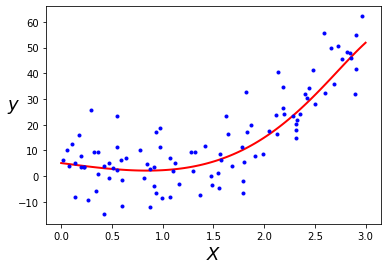

In [11]:
# plt.figure(figsize=(6, 4))

X_new = np.linspace(0, 3, 100).reshape(-1, 1)

X_new_poly = proprocessing.fit_transform(X_new)

y_pred = gridcv_lasso_model.predict(X_new_poly)


plt.plot(X_new, y_pred, 'r-', linewidth=2)

plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()


#vizualizes the comparisson between our prediction line and our random values